# Importing Dependencies

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

# Warnings handling
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KSPI.IL.csv to KSPI.IL.csv


In [ ]:
#Importing Dataset
df = pd.read_csv('KSPI.IL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-15,38.000000,44.959999,33.750000,41.500000,38.185608,4952506
1,2020-10-16,42.200001,43.485001,41.110001,42.250000,38.875710,428297
2,2020-10-19,42.994999,42.994999,40.275002,41.500000,38.185608,92311
3,2020-10-20,40.105000,42.000000,40.105000,41.799999,38.461655,276481
4,2020-10-21,42.450001,42.549999,41.099998,41.750000,38.415638,129435


In [ ]:
df.shape

(572, 7)

In [ ]:
df.reset_index(inplace=True)
df.describe()

,index,Open,High,Low,Close,Adj Close,Volume
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,285.500000,77.200612,79.043879,74.933375,76.783479,73.373373,5.152363e+04
std,165.266452,26.448400,26.700233,26.046603,26.280026,25.148347,2.130143e+05
min,0.000000,36.000000,37.900002,20.000000,35.000000,33.697083,1.147000e+03
25%,142.750000,55.000000,56.375000,52.574998,54.675000,52.952564,1.872050e+04
50%,285.500000,71.500000,73.000000,70.000000,71.099998,68.412048,3.032600e+04
75%,428.250000,95.124998,97.625000,93.025000,94.925002,89.960373,4.608500e+04
max,571.000000,145.600006,148.399994,141.000000,145.000000,138.412170,4.952506e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      572 non-null    int64  
 1   Date       572 non-null    object 
 2   Open       572 non-null    float64
 3   High       572 non-null    float64
 4   Low        572 non-null    float64
 5   Close      572 non-null    float64
 6   Adj Close  572 non-null    float64
 7   Volume     572 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 35.9+ KB


# Check for Correlation

In [ ]:
corr = df.corr(method='pearson')
corr

,index,Open,High,Low,Close,Adj Close,Volume
index,1.000000,-0.150396,-0.137970,-0.155191,-0.152731,-0.098209,-0.071057
Open,-0.150396,1.000000,0.996685,0.990771,0.992824,0.991159,-0.089275
High,-0.137970,0.996685,1.000000,0.990024,0.995426,0.994559,-0.074827
Low,-0.155191,0.990771,0.990024,1.000000,0.994935,0.993094,-0.103950
Close,-0.152731,0.992824,0.995426,0.994935,1.000000,0.998242,-0.086546
Adj Close,-0.098209,0.991159,0.994559,0.993094,0.998242,1.000000,-0.088689
Volume,-0.071057,-0.089275,-0.074827,-0.103950,-0.086546,-0.088689,1.000000


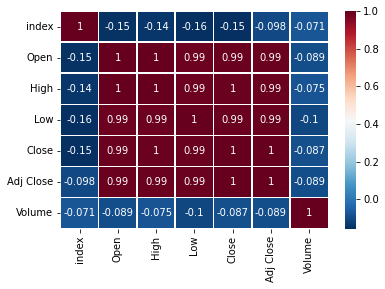

In [ ]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

# Exploratory Data Analysis

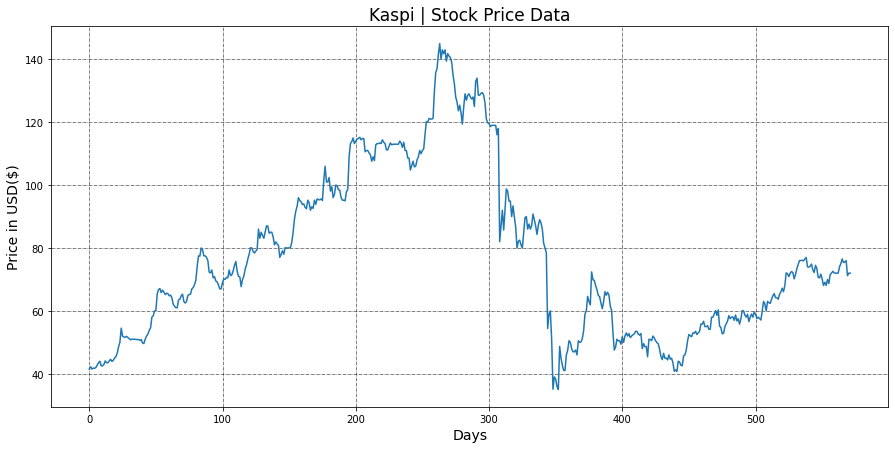

In [ ]:
#Exploratory Data Analysis
df['Close'].plot(figsize=(15, 7))
plt.title("Kaspi | Stock Price Data", fontsize=17)
plt.ylabel('Price in USD($)', fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [ ]:
df.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume
567,567,2023-01-17,75.400002,77.400002,75.400002,75.500000,75.500000,31555
568,568,2023-01-18,77.000000,78.000000,76.000000,76.000000,76.000000,31988
569,569,2023-01-19,73.000000,73.000000,69.300003,71.199997,71.199997,169197
570,570,2023-01-20,70.400002,73.500000,70.300003,72.000000,72.000000,57078
571,571,2023-01-23,74.000000,74.000000,71.500000,72.000000,72.000000,46759


In [ ]:
#Prepare dataset to work with 
nflx_df=df[['Date','High','Open','Low','Close']]
nflx_df.head(10)

,Date,High,Open,Low,Close
0,2020-10-15,44.959999,38.000000,33.750000,41.500000
1,2020-10-16,43.485001,42.200001,41.110001,42.250000
2,2020-10-19,42.994999,42.994999,40.275002,41.500000
3,2020-10-20,42.000000,40.105000,40.105000,41.799999
4,2020-10-21,42.549999,42.450001,41.099998,41.750000
5,2020-10-22,42.000000,41.849998,41.750000,42.000000
6,2020-10-23,43.450001,43.450001,42.000000,42.799999
7,2020-10-26,43.700001,43.049999,42.099998,43.500000
8,2020-10-27,44.950001,43.500000,43.450001,44.000000
9,2020-10-28,44.349998,44.000000,42.500000,42.500000


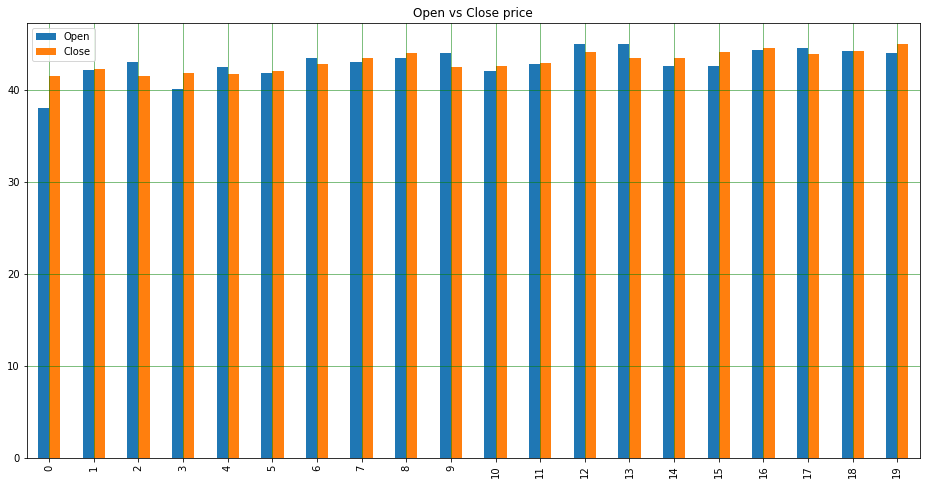

In [ ]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('Open vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

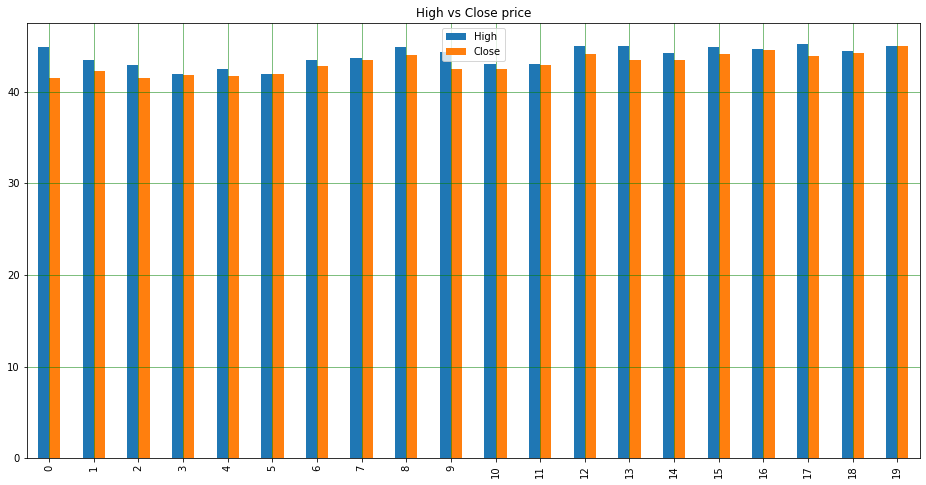

In [ ]:
#Plot High vs Close
nflx_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('High vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

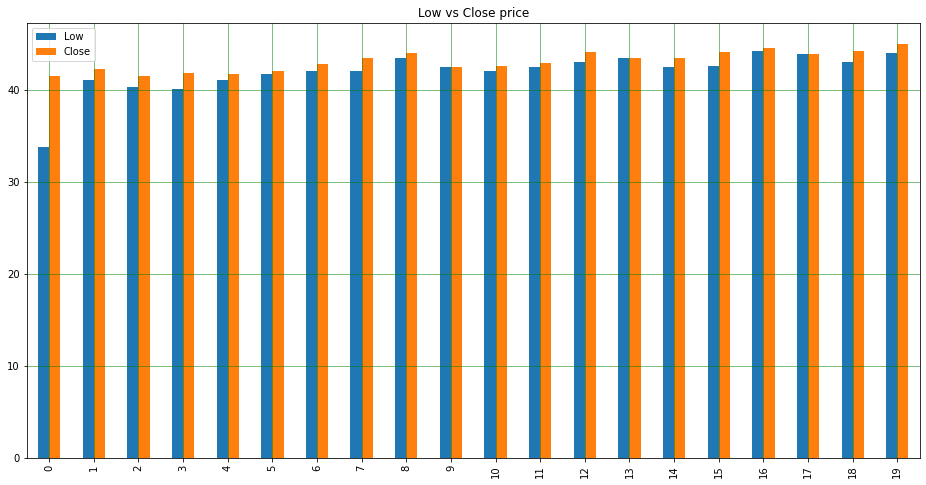

In [ ]:
#Plot Low vs Close
nflx_df[['Low','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.title('Low vs Close price')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Model Training and Testing

In [ ]:
nfx_df=nflx_df[['High','Open','Low','Close']]
nfx_df.head(10)

,High,Open,Low,Close
0,44.959999,38.000000,33.750000,41.500000
1,43.485001,42.200001,41.110001,42.250000
2,42.994999,42.994999,40.275002,41.500000
3,42.000000,40.105000,40.105000,41.799999
4,42.549999,42.450001,41.099998,41.750000
5,42.000000,41.849998,41.750000,42.000000
6,43.450001,43.450001,42.000000,42.799999
7,43.700001,43.049999,42.099998,43.500000
8,44.950001,43.500000,43.450001,44.000000
9,44.349998,44.000000,42.500000,42.500000


In [ ]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y = nfx_df.iloc[:, 3]

In [ ]:
print(X.shape) #output: (572, 4)
print(Y.shape) #output: (572,)

(572, 3)
(572,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [ ]:
print(x_train.shape) #output: (429, 4)
print(x_test.shape) #output: (143, 4)
print(y_train.shape) #output: (429,)
print(y_test.shape) #output: (143,)
#y_test to be evaluated with y_pred for Diff models

(429, 3)
(143, 3)
(429,)
(143,)


# Linear Regression Model Training and Testing


In [ ]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr_model.predict(x_test)

# Linear Regression Model Cross-Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.36598752630337


# Linear Regression Model - Data Visualization (Results)

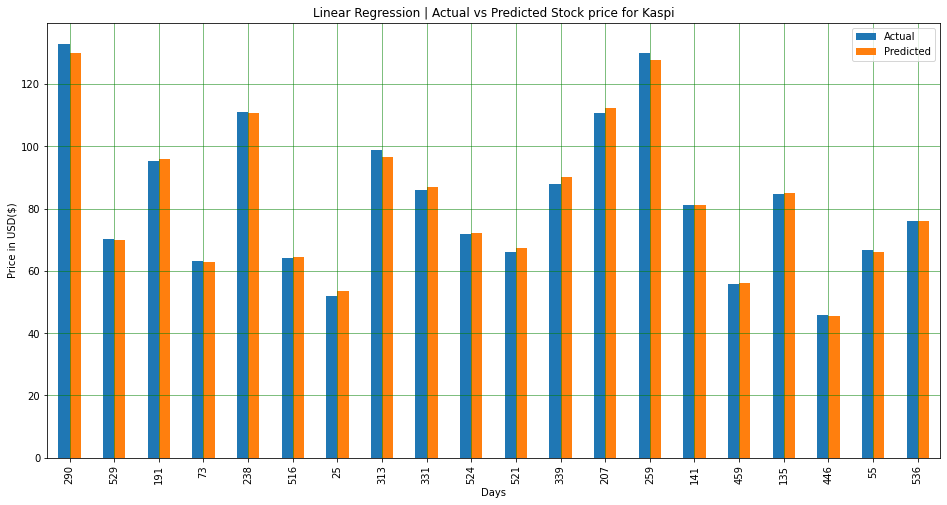

In [ ]:
plot_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Linear Regression | Actual vs Predicted Stock price for Kaspi')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.show()

# KNN Model Training and Testing

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

# KNN Cross-Validation


In [ ]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  98.92351913413306


# KNN Model - Data Visualization (Results)

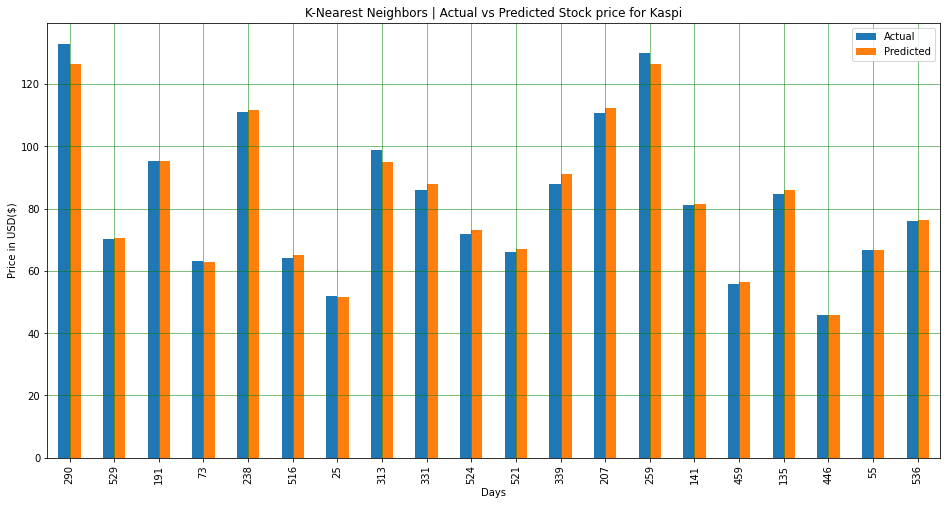

In [ ]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Predicted':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('K-Nearest Neighbors | Actual vs Predicted Stock price for Kaspi')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.show()

# Linear Kernel SVM Model Training and Testing


In [ ]:
from sklearn.svm import SVR
lin_svm_regressor = SVR(kernel='linear')
lin_svm_model=lin_svm_regressor.fit(x_train,y_train)
y_lin_svm_pred=lin_svm_model.predict(x_test)

# Linear Kernel SVM Model Cross-Validation

In [ ]:
lin_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(lin_svm_model, x_test, y_test.astype('int'), cv=lin_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.42523959948828


# Linear Kernel SVM Model - Data Visualization (Results)

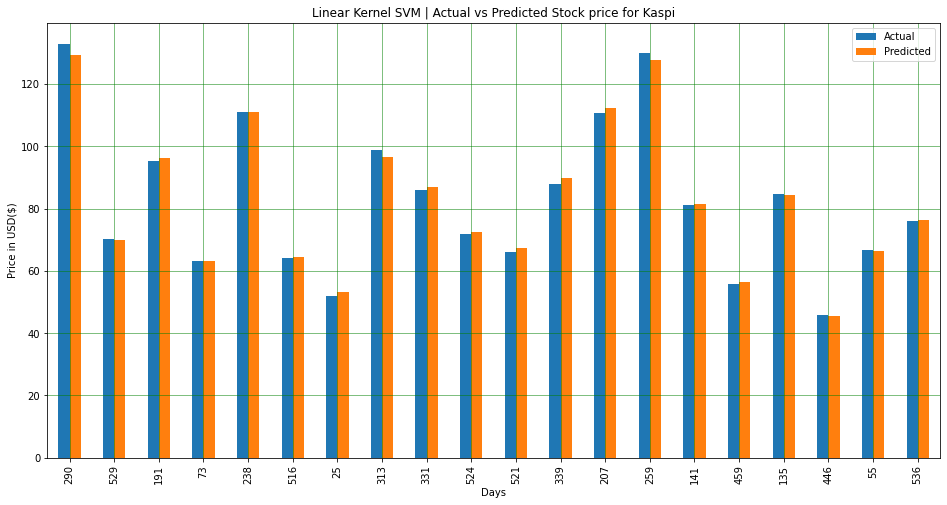

In [ ]:
plot_lin_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_lin_svm_pred})
plot_lin_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Linear Kernel SVM | Actual vs Predicted Stock price for Kaspi')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Polynomial Kernel SVM Model Training and Testing


In [ ]:
from sklearn.svm import SVR
poly_svm_regressor = SVR(kernel='poly')
poly_svm_model=poly_svm_regressor.fit(x_train,y_train)
y_poly_svm_pred=poly_svm_model.predict(x_test)

# Polynomial Kernel SVM Model Cross-Validation

In [ ]:
poly_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(poly_svm_model, x_test, y_test.astype('int'), cv=poly_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  85.34680511224379


# Polynomial Kernel SVM Model - Data Visualization (Results)

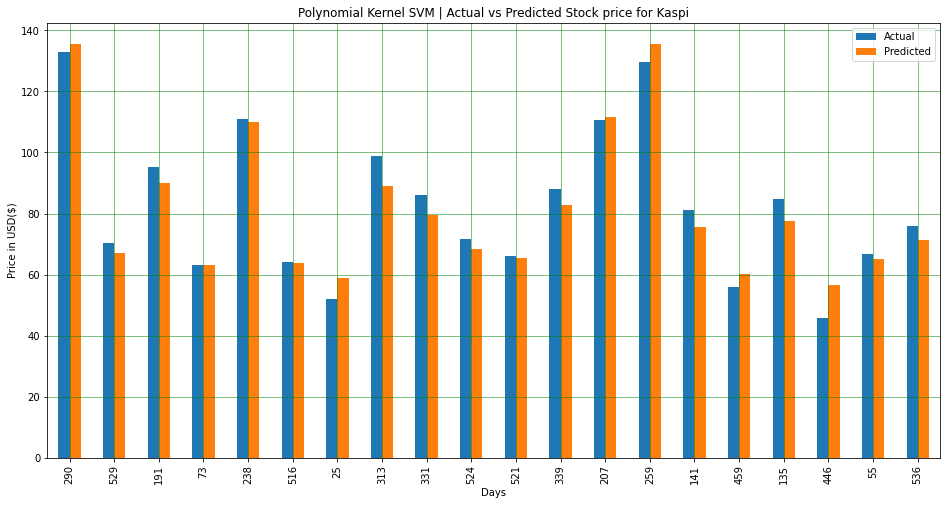

In [ ]:
plot_poly_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_poly_svm_pred})
plot_poly_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('Polynomial Kernel SVM | Actual vs Predicted Stock price for Kaspi')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# RBF Kernel SVM Model Training and Testing


In [ ]:
from sklearn.svm import SVR
rbf_svm_regressor = SVR(kernel='rbf')
rbf_svm_model=rbf_svm_regressor.fit(x_train,y_train)
y_rbf_svm_pred=rbf_svm_model.predict(x_test)

# RBF Kernel SVM Model Cross-Validation

In [ ]:
rbf_svm_kfold = model_selection.KFold(n_splits=20, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(rbf_svm_model, x_test, y_test.astype('int'), cv=rbf_svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  83.08437348597228


# RBF Kernel SVM Model - Data Visualization (Results)

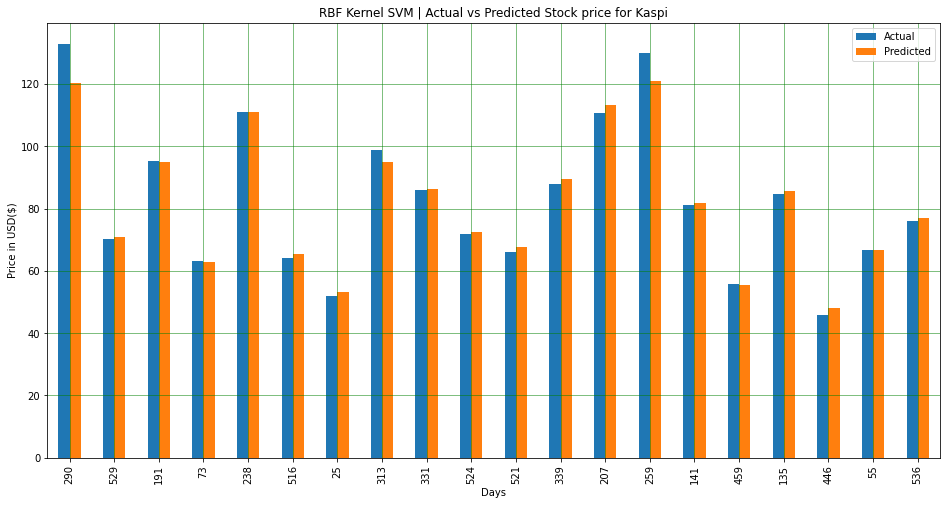

In [ ]:
plot_rbf_svm_df=pd.DataFrame({'Actual':y_test,'Predicted':y_rbf_svm_pred})
plot_rbf_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.title('RBF Kernel SVM | Actual vs Predicted Stock price for Kaspi')
plt.ylabel('Price in USD($)')
plt.xlabel('Days')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# RMSE (Root Mean Square Error)


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
import math

In [ ]:
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Regression Model Root mean square error: ',lr_mse)
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error: ',knn_mse)
lin_svm_mse=math.sqrt(mean_squared_error(y_test,y_lin_svm_pred))
print('Linear SVM Model Root mean square error: ',lin_svm_mse)
poly_svm_mse=math.sqrt(mean_squared_error(y_test,y_poly_svm_pred))
print('Polynomial SVM Model Root mean square error: ',poly_svm_mse)
rbf_svm_mse=math.sqrt(mean_squared_error(y_test,y_rbf_svm_pred))
print('RBF SVM Model Root mean square error: ',rbf_svm_mse)

Linear Regression Model Root mean square error:  1.464527325630162
KNN Model Root mean square error:  1.8479328255668526
Linear SVM Model Root mean square error:  1.4182519568720273
Polynomial SVM Model Root mean square error:  7.3695675910949054
RBF SVM Model Root mean square error:  4.05775687127869


# R2 or r-squared error

In [ ]:
print('Linear Regression R2: ', r2_score(y_test, y_pred))
print('KNN R2: ', r2_score(y_test, y_knn_pred))
print('Linear SVM R2: ', r2_score(y_test, y_lin_svm_pred))
print('Polynomial SVM R2: ', r2_score(y_test, y_poly_svm_pred))
print('RBF SVM R2: ', r2_score(y_test, y_rbf_svm_pred))

Linear Regression R2:  0.9965695634463507
KNN R2:  0.9945383131871006
Linear SVM R2:  0.9967829247780351
Polynomial SVM R2:  0.9131362757552453
RBF SVM R2:  0.9736654151408106
